# Machine Learning with Python - Linear Regression
The basics of prediction with linear models

### closed form, gradient descent, and sklearn
Working through all the methods to conduct OLS optimization for linear regression. Ending with **sci-kit learn** the most popular framework for fiting popular small data models

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 6.6 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf

let's use some finance data collected from the Yahoo! finance API using [yfinance](https://github.com/ranaroussi/yfinance). for the linear regression example. We will compare Microsoft monthly returns (MSFT) vs. the market (SPY or S&P 500).

In [3]:
start_date = datetime(2010, 1, 1)
end_date = datetime(2021, 12, 31)

stock_data = yf.download('SPY MSFT', 
                   interval = "1mo",
                   start=start_date, 
                   end=end_date)

stock_data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                   High  \
                 MSFT        SPY       MSFT         SPY       MSFT   
Date                                                                 
2010-01-01  21.563450  83.818016  28.180000  107.389999  31.240000   
2010-02-01  21.938400  86.432709  28.670000  110.739998  29.030001   
2010-03-01  22.517643  91.318642  29.290001  117.000000  30.570000   
2010-04-01  23.478624  93.113213  30.540001  118.809998  31.580000   
2010-05-01  19.834583  85.714935  25.799999  109.370003  31.059999   

                              Low                   Open              \
                   SPY       MSFT         SPY       MSFT         SPY   
Date                                                                   
2010-01-01  115.139999  27.660000  107.220001  30.620001  112.370003   
2010-02-01  111.580002  27.570000  104.580002  28.389999  108.150002   
2010-03-01  118.169998  28.240000  111.169998  28.770000  111.199997   
2010-04-01  122.120003  28.620001  117.099998  29.350000  117.800003   
2010-05-01  120.680000  24.559999  104.379997  30.670000  119.379997   

                  Volume                
                    MSFT           SPY  
Date                                    
2010-01-01  1.359651e+09  3.706842e+09  
2010-02-01  1.074643e+09  4.451912e+09  
2010-03-01  1.110237e+09  3.899688e+09  
2010-04-01  1.319030e+09  3.887090e+09  
2010-05-01  1.720130e+09  7.413879e+09

In [4]:
stock_data.columns

MultiIndex([('Adj Close', 'MSFT'),
            ('Adj Close',  'SPY'),
            (    'Close', 'MSFT'),
            (    'Close',  'SPY'),
            (     'High', 'MSFT'),
            (     'High',  'SPY'),
            (      'Low', 'MSFT'),
            (      'Low',  'SPY'),
            (     'Open', 'MSFT'),
            (     'Open',  'SPY'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'SPY')],
           )

In [5]:
stock_data_adj_close = stock_data.iloc[:, stock_data.columns.get_level_values(0) == 'Adj Close'].pct_change().dropna()
stock_data_adj_close.columns = ['MSFT','SPY']
stock_data_adj_close.head()


,MSFT,SPY
Date,,
2010-02-01,0.017388,0.031195
2010-03-01,0.026403,0.056529
2010-04-01,0.042677,0.019652
2010-05-01,-0.155207,-0.079455
2010-06-01,-0.104115,-0.056231


In [6]:
from seaborn import scatterplot

<AxesSubplot:xlabel='MSFT', ylabel='SPY'>

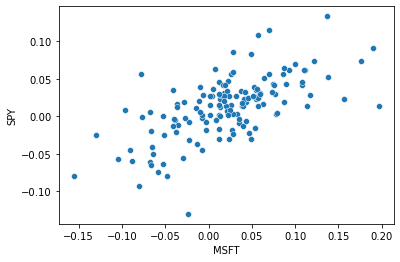

In [7]:
scatterplot(data = stock_data_adj_close, x = 'MSFT', y = 'SPY')

Let's look at creating our linear regession model using closed form [OLS model](https://towardsdatascience.com/manually-computing-coefficients-for-an-ols-regression-using-python-50d8e413de)

In [8]:
x = stock_data_adj_close.SPY.values

ones = np.ones(len(x))

x = np.vstack((ones,x))

x = x.T

y = stock_data_adj_close.MSFT.values

In [9]:
#closed form calculation
betas = np.linalg.inv(x.T @ x) @ x.T @ y
print(betas)

[0.00867069 0.96868159]


Now lets do the same thing but with [**gradient descent.**](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

In [10]:
x = x[:,1] #remove the ones column for this part

In [15]:
# initalize the parameters at 0 (not always a good idea!)
b_1 = 0.01
b_0 = 0.01

alpha = 0.1  # The learning Rate
epochs = 50000  # The number of descent iterations

n = float(len(x)) # Number of elements in x

# Gradient Descent 
for i in range(epochs): 
    y_pred = b_1*x + b_0  # The current predicted value of y
    D_b_1 = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt b_1
    D_b_0 = (-2/n) * sum(y - y_pred)  # Derivative wrt b_0
    b_1 = b_1 - alpha * D_b_1  # Update b_1
    b_0 = b_0 - alpha * D_b_0  # Update b_0
    
print (b_0, b_1)

0.008670694372711278 0.9686815243125058


Now let's see how this is done using sklearn

In [16]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [17]:
#keep in mind we would need to split this data. However, this data is timeseries so we can only test it by using it to predict forward.
regr = LinearRegression()
x = x.reshape(-1, 1) #shape needed for sklearn
regr.fit(x, y)
print(regr.score(x, y)) #gives us r^2

0.4151053764195878


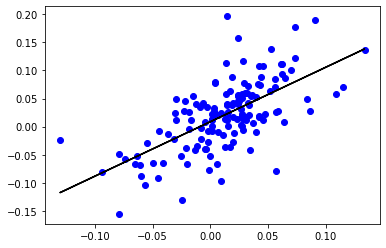

In [18]:
plt.scatter(x, y,color='b')
plt.plot(x, regr.predict(x),color='k')

plt.show()

In [19]:
#predict going forward
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

stock_data = yf.download('MSFT SPY', 
                   interval = "1mo",
                   start=start_date, 
                   end=end_date)

stock_data_adj_close = stock_data.iloc[:, stock_data.columns.get_level_values(0) == 'Adj Close'].pct_change().dropna()

stock_data_adj_close.columns = ['MSFT','SPY']

x = stock_data_adj_close.SPY.values
x = x.reshape(-1,1)

y = stock_data_adj_close.MSFT.values

[*********************100%***********************]  2 of 2 completed


In [20]:
from sklearn.metrics import r2_score

r2_score(y, regr.predict(x))

0.6878736767442797

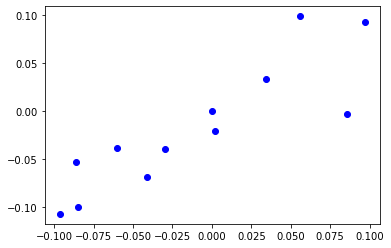

In [21]:
plt.scatter(x, y, color='b')

plt.show()